<a href="https://colab.research.google.com/github/allydrzewo/CS370-Assignments/blob/main/assignment-1/Assignment1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGD and Momentum

In [ ]:
import torch
import torch.linalg as linalg
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(0)

# Hyperparameters for dataset generation
num_samples = 100  # Number of data points
sigma = 0.3  # Standard deviation for noise

# Generate the data
x = torch.rand(num_samples, 1)  # Uniformly distributed random variable in [0, 1]
epsilon = torch.normal(mean=0.0, std=sigma, size=(num_samples, 1))  # Noise
y = torch.sin(2 * torch.pi * x) + epsilon  # True function with noise
# Reshape data
x = x.view(-1, 1)
y = y.view(-1, 1)

# Hyperparameters (training)
learning_rate = 0.1
num_epochs = 1000
lambda_reg = 0.01
momentum = 0.9  # Momentum factor

# Initialize weights and bias for standard SGD
W_sgd = torch.rand(1, 1, requires_grad=False)
b_sgd = torch.rand(1, requires_grad=False)

# Function to compute MSE loss with L2 regularization
def compute_loss(X, y, W, b, lambda_reg):
    y_pred = X @ W + b
    mse_loss = torch.mean((y_pred - y) ** 2)
    l2_reg = lambda_reg * torch.linalg.norm(W) ** 2
    return mse_loss + l2_reg

# Training loop for standard SGD (no momentum)
losses_sgd = []

for epoch in range(num_epochs):
    # Shuffle the data at each epoch (SGD property)
    indices = torch.randperm(num_samples)
    X_shuffled = x[indices]
    y_shuffled = y[indices]

    for i in range(num_samples):
        # Single sample for SGD
        xi = X_shuffled[i].view(1, -1)
        yi = y_shuffled[i]
        # Compute predictions
        y_pred = xi @ W_sgd + b_sgd
        # Compute gradients
        error = y_pred - yi
        grad_W = 2 * xi.T @ error + 2 * lambda_reg * W_sgd  # Gradient wrt W
        grad_b = 2 * error  # Gradient wrt b
        # Update weights and bias (SGD)
        W_sgd -= learning_rate * grad_W
        b_sgd -= learning_rate * grad_b.item()

    # Compute loss at end of the epoch
    loss = compute_loss(x, y, W_sgd, b_sgd, lambda_reg)
    losses_sgd.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, SGD Loss: {loss.item()}')

# Save the final weights and biases for standard SGD
final_W_sgd = W_sgd.clone()
final_b_sgd = b_sgd.clone()

# Initialize weights and bias, and velocity terms for momentum
W_momentum = torch.rand(1, 1, requires_grad=False)
b_momentum = torch.rand(1, requires_grad=False)
v_W = torch.zeros_like(W_momentum)
v_b = torch.zeros_like(b_momentum)

# Training loop with momentum
losses_momentum = []

for epoch in range(num_epochs):
    # Shuffle the data at each epoch (SGD property)
    indices = torch.randperm(num_samples)
    X_shuffled = x[indices]
    y_shuffled = y[indices]

    for i in range(num_samples):
        # Single sample for SGD
        xi = X_shuffled[i].view(1, -1)
        yi = y_shuffled[i]
        # Compute predictions
        y_pred = xi @ W_momentum + b_momentum
        # Compute gradients
        error = y_pred - yi
        grad_W = 2 * xi.T @ error + 2 * lambda_reg * W_momentum  # Gradient wrt W
        grad_b = 2 * error  # Gradient wrt b
        # Update velocities (momentum)
        v_W = momentum * v_W + learning_rate * grad_W
        v_b = momentum * v_b + learning_rate * grad_b.item()
        # Update weights and bias
        W_momentum -= v_W
        b_momentum -= v_b

    # Compute loss at end of the epoch
    loss = compute_loss(x, y, W_momentum, b_momentum, lambda_reg)
    losses_momentum.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Momentum Loss: {loss.item()}')

# Save final weights and biases for momentum-based SGD
final_W_momentum = W_momentum.clone()
final_b_momentum = b_momentum.clone()

Epoch 0, SGD Loss: 0.3582597076892853
Epoch 100, SGD Loss: 0.3299521505832672
Epoch 200, SGD Loss: 0.3318063020706177
Epoch 300, SGD Loss: 0.32544565200805664
Epoch 400, SGD Loss: 0.3391234874725342
Epoch 500, SGD Loss: 0.3208768367767334
Epoch 600, SGD Loss: 0.3759416937828064
Epoch 700, SGD Loss: 0.3938612937927246
Epoch 800, SGD Loss: 0.32747408747673035
Epoch 900, SGD Loss: 0.36753013730049133
Epoch 0, Momentum Loss: 4.266905784606934
Epoch 100, Momentum Loss: 0.6428816318511963
Epoch 200, Momentum Loss: 0.4912388324737549
Epoch 300, Momentum Loss: 0.6084434986114502
Epoch 400, Momentum Loss: 0.5336199998855591
Epoch 500, Momentum Loss: 0.3781106173992157
Epoch 600, Momentum Loss: 1.0747586488723755
Epoch 700, Momentum Loss: 0.5248603224754333
Epoch 800, Momentum Loss: 0.47276565432548523
Epoch 900, Momentum Loss: 0.43308085203170776


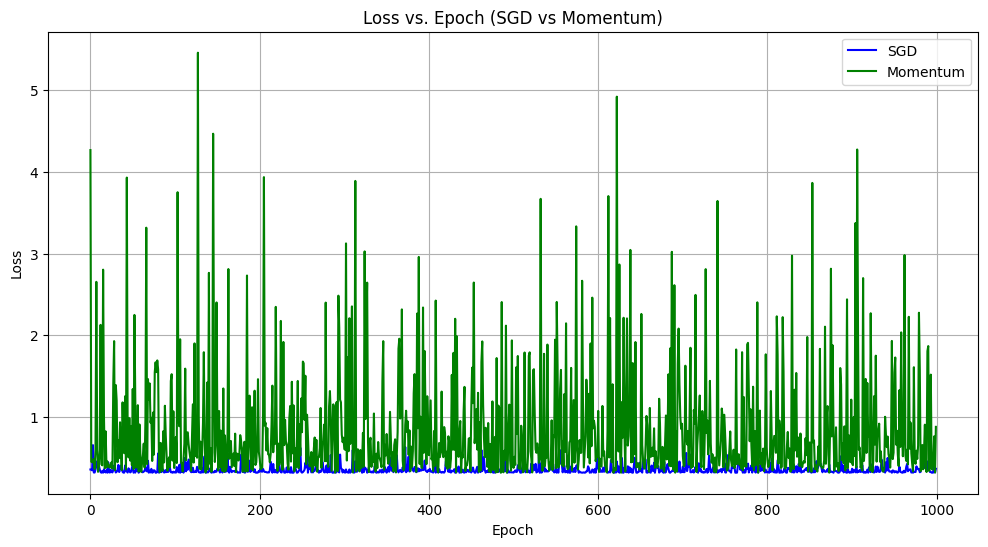

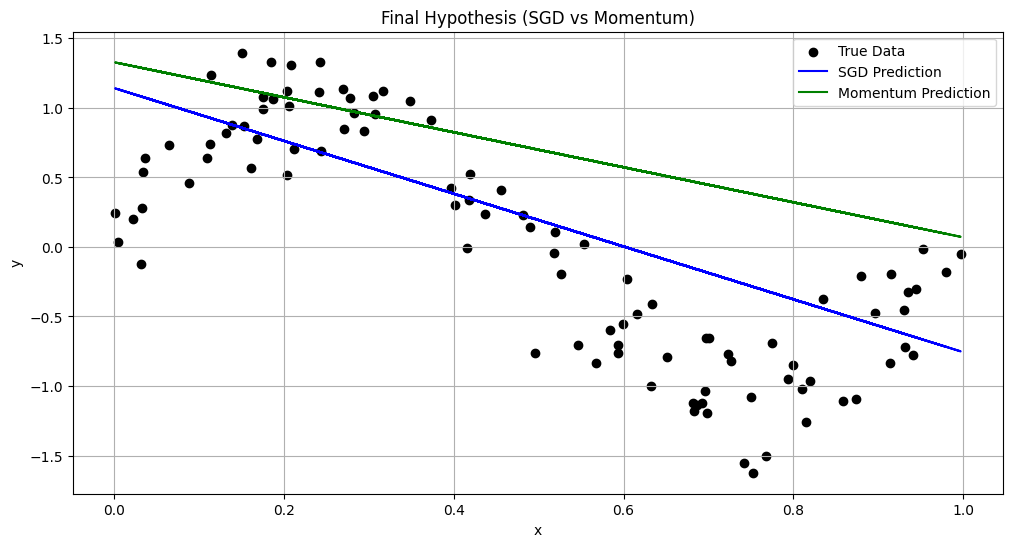

In [ ]:
# Plot loss vs epoch for both SGD and Momentum
plt.figure(figsize=(12, 6))
plt.plot(losses_sgd, label='SGD', color='blue')
plt.plot(losses_momentum, label='Momentum', color='green')
plt.title('Loss vs. Epoch (SGD vs Momentum)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Final hypothesis with SGD
y_pred_sgd = (x @ final_W_sgd + final_b_sgd).detach()  # Using final weights from standard SGD

# Final hypothesis with Momentum
y_pred_momentum = (x @ final_W_momentum + final_b_momentum).detach()  # Using final weights from momentum-based SGD

# Plot final hypothesis for both SGD and Momentum
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='True Data', color='black')
plt.plot(x, y_pred_sgd, label='SGD Prediction', color='blue')
plt.plot(x, y_pred_momentum, label='Momentum Prediction', color='green')
plt.title('Final Hypothesis (SGD vs Momentum)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Logistic Regression

In [18]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load data
train_df = pd.read_csv('avazu-ctr-prediction/train.gz', compression='gzip')
test_df = pd.read_csv('avazu-ctr-prediction/test.gz', compression='gzip')

# Handle missing data
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

# Encode categorical data to numerical values using pd.get_dummies one hot encoding
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
# Align columns in both train and test sets to ensure consistency
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

# Split features(X) and target(y)
X_train = train_df.drop(columns='click')
y_train = train_df['click']
X_test = test_df.drop(columns='click')
y_test = test_df['click']

# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for mini-batch training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'avazu-ctr-prediction/train.gz'

In [ ]:
import torch.nn as nn

# Define logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        # Linear transformation (input -> output)
        self.linear = nn.Linear(input_size, 1)
    def forward(self, x):
        # Apply the linear transformation followed by sigmoid activation
        out = torch.sigmoid(self.linear(x))
        return out

# Initialize model
input_size = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_size)
# Define loss and optimizer
criterion = nn.BCELoss()  # Binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Training logistic regression model
num_epochs = 100

for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#Get model predictions
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_train = y_pred_train.detach().numpy()

#Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_train, y_pred_train)

#Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()